# EDA?
hopefully I can actually start it this time ~> 3 days later update: I ended up doing more cleaning just to do one groupby table lmao

In [1]:
import pandas as pd
import numpy as np #I barely have use for numpy yet I import it every time
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re

steps to take:
* get frequency of brands(how often they appear) per sub category
* average price per sub category per country
* compare by country price per unit by sub category
* what are the most frequent brands per sub category per country
* words used in product name
* words used in description(malaysia and philippines only)

In [ ]:
df = pd.read_excel("backup_countries_combined4.xlsx")

In [ ]:
copy = df.copy()

In [ ]:
copy.info()

In [ ]:
copy["cat2"] = copy["cat2"].apply(lambda x: x.strip())

In [ ]:
copy.groupby(['country','cat2']).size()

In [ ]:
copy.groupby(['country','cat2']).mean()

### realised that the Indonesian price per unit is just way off. Turns out they use a period instead of a comma for thousands. Have to calculate ppu again just for Indonesia

In [ ]:
price = []
for i in copy.index:
    if copy["country"][i] == "ID":
        price.append(copy["price"][i]*1000)
    else:
        price.append(copy["price"][i])
copy["price"] = price

In [ ]:
copy.to_excel("backup_countries_combined5.xlsx",index=False)

In [6]:
df = pd.read_excel("backup_countries_combined5.xlsx")
copy = df.copy()

In [7]:
ppu = []
for i in copy.index:
    price = copy["price"][i]
    units = copy["units"][i]
    qty = copy["qty"][i]
    amnt = copy["amounts"][i]
    if copy["country"][i] == "ID":
        if units in ["ml","g"]:
            new_ppu = price/(qty*amnt)*10
            ppu.append(new_ppu)
        elif units in ["kg","l"]:
            new_ppu = price/(qty*amnt*1000)*10
            ppu.append(new_ppu)
        else:
            ppu.append(price/(qty*amnt))
    else:
        ppu.append(copy["ppu"][i])
copy["ppu"] = ppu

In [8]:
copy.to_excel("backup_countries_combined6.xlsx",index=False)

In [9]:
df = pd.read_excel("backup_countries_combined6.xlsx")
copy = df.copy()

In [10]:
copy.groupby(['country','cat2']).mean()

price       qty     amounts  \
country cat2                                                              
ID      Bath & Toiletries            10275.000000  1.000000   20.100000   
        Diapers                     119501.076923  1.000000   32.315385   
        Feeding & Nursing            34089.624413  1.000000  156.333333   
        Food                         17915.862069  1.068966  107.086207   
        Formula                     141469.934498  1.087336  677.565939   
        Kids Health & Skincare       18070.000000  1.000000  157.600000   
KR      Baby Furniture              193641.409722  1.000000    2.056944   
        Baby Gear                   102948.219778  1.000000    2.396929   
        Baby Safety                 145199.736663  1.000000    1.000568   
        Bath & Toiletries            23010.882768  3.901243   41.079610   
        Diapers                      44078.446841  1.218285   61.255778   
        Feeding & Nursing            24110.632568  1.229123   68.430237   
        Food                         29762.436893  5.387467  107.468138   
        Formula                      83653.679321  6.997003  558.072008   
        Kids Sports & Outdoor Play   45191.793756  1.000000    1.775333   
        Maternity                    39519.406375  1.000000   22.227092   
        Toys & Education             75829.497562  1.061298    2.899092   
MY      Baby & Toddler Play             31.257143  1.000000    1.571429   
        Baby Gear                      212.565322  1.000000    1.000000   
        Baby Safety                     25.166667  1.000000   17.333333   
        Bath & Toiletries               17.332261  1.518931  311.464365   
        Diapers                         72.821890  1.532146   70.052672   
        Feeding & Nursing               70.937278  1.248521  129.911243   
        Food                            14.026708  1.427984  181.227984   
        Formula                         82.322609  1.273098  518.658832   
        Kids Health & Skincare          24.392845  3.068966  153.935345   
        Kids Sports & Outdoor Play      41.593333  1.000000    8.133333   
        Maternity                       39.900000  1.000000    1.000000   
        Nursery                         23.844262  1.000000    1.737705   
        Others.                         21.952500  1.000000   16.250000   
        Toys & Education                37.822737  1.000000    7.412804   
PH      Baby Gear                     3686.959770  1.000000    9.557471   
        Baby Laundry                   298.869565  1.000000  407.034783   
        Bath & Toiletries              581.955414  1.000000    1.624204   
        Diapers                        505.779487  1.276923   21.833333   
        Feeding & Nursing              652.454857  1.000000   87.325714   
        Kids Health & Skincare         337.079208  1.000000   71.415842   
        Maternity                      602.319018  1.000000    1.000000   
        Nursery                        998.372197  1.000000    2.118834   
        Others.                        586.644068  1.016949   61.694915   
        Toys & Education               299.000000  1.000000    1.000000   
        Wipes                          157.021277  1.680851   31.542553   
SG      Baby Clothing                   32.997297  1.229730   23.662162   
        Baby Furniture                  82.316522  1.000000    4.095652   
        Baby Gear                      209.278704  1.000000    1.018519   
        Baby Laundry                    22.223200  1.784000  562.247120   
        Baby Safety                     59.744375  1.000000    1.000000   
        Bath & Toiletries               23.894687  1.521030  157.050558   
        Diapers                         46.947175  2.415254   47.157627   
        Feeding & Nursing               25.651976  1.011583   34.559202   
        Food                             8.803217  1.869930  112.228811   
        Formula                         80.430990  1.723958  655.4354

In [11]:
copy.groupby(['cat2','country']).mean()

price       qty     amounts  \
cat2                       country                                        
Baby & Toddler Play        MY           31.257143  1.000000    1.571429   
Baby Clothing              SG           32.997297  1.229730   23.662162   
Baby Furniture             KR       193641.409722  1.000000    2.056944   
                           SG           82.316522  1.000000    4.095652   
Baby Gear                  KR       102948.219778  1.000000    2.396929   
                           MY          212.565322  1.000000    1.000000   
                           PH         3686.959770  1.000000    9.557471   
                           SG          209.278704  1.000000    1.018519   
Baby Laundry               PH          298.869565  1.000000  407.034783   
                           SG           22.223200  1.784000  562.247120   
Baby Safety                KR       145199.736663  1.000000    1.000568   
                           MY           25.166667  1.000000   17.333333   
                           SG           59.744375  1.000000    1.000000   
Bath & Toiletries          ID        10275.000000  1.000000   20.100000   
                           KR        23010.882768  3.901243   41.079610   
                           MY           17.332261  1.518931  311.464365   
                           PH          581.955414  1.000000    1.624204   
                           SG           23.894687  1.521030  157.050558   
Diapers                    ID       119501.076923  1.000000   32.315385   
                           KR        44078.446841  1.218285   61.255778   
                           MY           72.821890  1.532146   70.052672   
                           PH          505.779487  1.276923   21.833333   
                           SG           46.947175  2.415254   47.157627   
Feeding & Nursing          ID        34089.624413  1.000000  156.333333   
                           KR        24110.632568  1.229123   68.430237   
                           MY           70.937278  1.248521  129.911243   
                           PH          652.454857  1.000000   87.325714   
                           SG           25.651976  1.011583   34.559202   
Food                       ID        17915.862069  1.068966  107.086207   
                           KR        29762.436893  5.387467  107.468138   
                           MY           14.026708  1.427984  181.227984   
                           SG            8.803217  1.869930  112.228811   
Formula                    ID       141469.934498  1.087336  677.565939   
                           KR        83653.679321  6.997003  558.072008   
                           MY           82.322609  1.273098  518.658832   
                           SG           80.430990  1.723958  655.435417   
Kids Health & Skincare     ID        18070.000000  1.000000  157.600000   
                           MY           24.392845  3.068966  153.935345   
                           PH          337.079208  1.000000   71.415842   
Kids Sports & Outdoor Play KR        45191.793756  1.000000    1.775333   
                           MY           41.593333  1.000000    8.133333   
Maternity                  KR        39519.406375  1.000000   22.227092   
                           MY           39.900000  1.000000    1.000000   
                           PH          602.319018  1.000000    1.000000   
                           SG           32.791228  1.000000    3.719298   
Nursery                    MY           23.844262  1.000000    1.737705   
                           PH          998.372197  1.000000    2.118834   
Others.                    MY           21.952500  1.000000   16.250000   
                           PH          586.644068  1.016949   61.694915   
Toys & Education           KR        75829.497562  1.061298    2.899092   
                           MY           37.822737  1.000000    7.412804   
                           PH          299.000000  1.000000    1.0000

### found another point where I messed up ~> bottles and other containers have units in ml and etc and these ppu got miscalculated
### I'll think of a smart programming way to solve this(probably conditional logic related to categories) but I am on a deadline and will just do it quickly in excel and find a smarter way later when the entire thing is over
### I have to parse over the categories myself to see because the machine can't judge agihwirhigrowrgboueger I'm so dumb
### I'm putting way too much effort into just making some pivot tables and bar graphs lmao

In [13]:
df = pd.read_excel("backup_countries_combined6.xlsx")
copy = df.copy()

In [12]:
from forex_python.converter import CurrencyRates
c = CurrencyRates()
country_codes = ["SGD","MYR","IDR","PHP"]
exchange_rates = {}
for i in country_codes:
    exchange_rates[i] = c.get_rates(i)["KRW"]
exchange_rates

{'SGD': 840.5061720737,
 'MYR': 276.1883408072,
 'IDR': 0.0797320962,
 'PHP': 23.2283613049}

In [15]:
ppu_list = []
for i in copy.index:
    ppu = copy["ppu"][i]
    units = copy["units"][i]
    country = copy["country"][i]
    if country == "KR":
        price = copy["price"][i]
    elif country == "SG":
        price = copy["price"][i] * exchange_rates['SGD']
    elif country == "MY":
        price = copy["price"][i] * exchange_rates['MYR']
    elif country == "ID":
        price = copy["price"][i] * exchange_rates['IDR']
    elif country == "PH":
        price = copy["price"][i] * exchange_rates['PHP']
    qty = copy["qty"][i]
    amnts = copy["amounts"][i]
    if units in ["g","ml"]:
        ppu_list.append(price/(qty*amnts)*10)
    elif units in ["kg","l"]:
        ppu_list.append(price/(qty*amnts*1000)*10)
    else:
        ppu_list.append(price/(qty*amnts))
copy["ppu"] = ppu_list

In [16]:
copy.to_excel("backup_countries_combined7.xlsx",index=False)

### this analysis is a nightmare there's just so much stuff to consider due to the variety of units and product types oh my god why did I think this would be simple to do
### moral of the story => do very very very specific and extensive planning before the project
### how I feel right now:

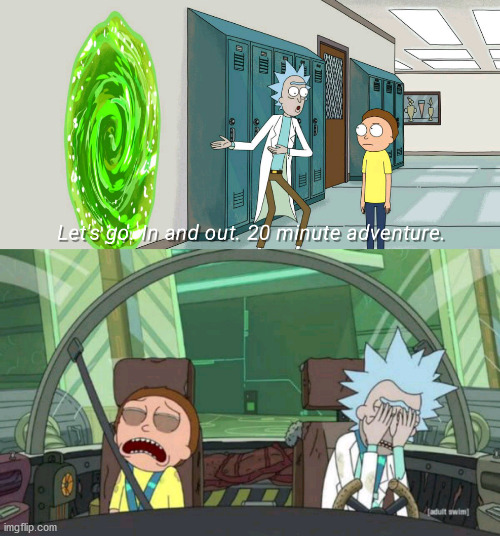

In [8]:
df = pd.read_excel("backup_countries_combined7.xlsx")
copy = df.copy()

In [16]:
df = pd.read_excel("backup_countries_combined8.xlsx")
copy = df.copy()

In [22]:
df = pd.read_excel("backup_countries_combined9.xlsx")
copy = df.copy()

In [23]:
ppu_list = []
for i in copy.index:
    ppu = copy["ppu"][i]
    units = copy["units"][i]
    country = copy["country"][i]
    if country == "KR":
        price = copy["price"][i]
    elif country == "SG":
        price = copy["price"][i] * exchange_rates['SGD']
    elif country == "MY":
        price = copy["price"][i] * exchange_rates['MYR']
    elif country == "ID":
        price = copy["price"][i] * exchange_rates['IDR']
    elif country == "PH":
        price = copy["price"][i] * exchange_rates['PHP']
    qty = copy["qty"][i]
    amnts = copy["amounts"][i]
    if units in ["g","ml"]:
        ppu_list.append(price/(qty*amnts)*10)
    elif units in ["kg","l"]:
        ppu_list.append(price/(qty*amnts*1000)*10)
    else:
        ppu_list.append(price/(qty*amnts))
copy["ppu"] = ppu_list

In [24]:
copy.to_excel("backup_countries_combined9.xlsx",index=False)

### I've been doing "sanity checks" on the numbers as I make these tables and have been removing rows that don't make sense, I recorded the reasons and to why I removed them and kept the product names(usually missing values) -> note to self don't fill in missing values just leave them be
### categories removed and reasons
#### hip seats strollers walkers ~> too large and heavy to ship, too expensive, not all countries sold this so jacked ppu up
#### backup_countries_combined.xlsx has the removed rows, categories and reasons recorded
### extra data cleaning
#### packs ~> ea by imputing averages
### there were a lot more units than I thought there were so amounts and quantities weren't extracted properly by regex so had to fix that, not too many but the prices were high enough that it messed up the values
### goes to show how important domain knowledge is when doing data analysis, I had no clue about baby/kids products and that is why I struggled

In [25]:
copy.groupby(['cat2','country']).mean()

price       qty     amounts  \
cat2                       country                                        
Baby Gear                  KR        46027.341732  1.000000    2.356067   
                           MY           42.702208  1.051948    1.285714   
                           PH         1315.506977  1.000000    1.000000   
                           SG          178.101000  1.000000    1.020000   
Baby Safety                KR       146220.644144  1.000000    1.000000   
                           MY           25.166667  1.000000   17.333333   
                           PH          472.130435  1.000000    6.521739   
                           SG           59.744375  1.000000    1.000000   
Bath & Toiletries          ID        21528.235294  1.000000  193.852941   
                           KR        20632.668242  3.915626   41.159636   
                           MY           16.961607  1.435733  304.457584   
                           PH          437.007648  1.122371  104.638623   
                           SG           23.894687  1.521030  157.050558   
Diapers                    ID       121189.527559  1.000000   33.055118   
                           KR        35508.096121  1.306914   96.660202   
                           MY           72.094382  1.528765   76.481387   
                           PH          519.016807  1.000000   33.042017   
                           SG           47.701652  2.402402   49.471471   
Feeding & Nursing          ID        42374.255319  1.000000   69.872340   
                           KR        19305.855565  1.230850    4.225942   
                           MY           70.937278  1.248521   64.739645   
                           PH          566.739953  1.000000   50.426714   
                           SG           25.651976  1.131918    3.380952   
Food                       ID        17915.862069  1.068966  107.086207   
                           KR        23967.636607  5.579464  122.922679   
                           MY           14.026708  1.427984  181.227984   
                           SG            8.803217  1.869930  112.228811   
Formula                    ID       141469.934498  1.087336  684.539738   
                           KR        76375.809717  7.768219  568.152976   
                           MY           82.322609  1.273098  539.162908   
                           SG           80.430990  1.723958  655.435417   
Kids Health & Skincare     ID        25742.083333  1.000000  138.281250   
                           MY           22.884913  2.413295  224.875723   
                           PH          232.988142  1.000000   50.106719   
Kids Sports & Outdoor Play KR        39979.500258  1.000000    1.782137   
                           MY           37.428571  1.000000    8.642857   
Maternity                  KR        35164.574297  1.000000   22.397590   
                           MY           39.900000  1.000000    1.000000   
                           PH          602.319018  1.000000    1.000000   
                           SG           32.791228  1.000000    3.719298   
Toys & Education           KR        64625.406044  1.062591    2.873446   
                           MY           37.822737  1.000000    7.412804   
                           PH          577.947368  1.000000    1.000000   
                           SG           31.710572  1.000000    5.168111   

                                              ppu  
cat2                       country                 
Baby Gear                  KR        45441.835976  
                           MY        11628.557382  
                           PH        30557.071355  
                           SG       149494.108777  
Baby Safety                KR       146220.644144  
                           MY         5885.573543  
                           PH        10635.155720  
                           SG        50215.515934  
Bath & Toiletries          ID          233.508738  
                     

# I think I'm done(for now)
## Lessons learned:
### 1. Do some googling on the topic of anlaysis and set up a plan before cleaning and especially merging data from many sources
### 2. Have a more specific goal in mind than just "Hurr durr compare prices haha"
### 3. Investigate all the edge cases for regex. When you think you investigated them all, look over again and again and again. This will save you tons of time
### 4. When dealing with currencies, make sure to find out how they show thousands
### 5. Try to do everything in python. I think this project was 66% python 34% excel.
## None coding leftovers:
### Find out the reason for price differences besides cost of living/currency differences by looking over the products within the subcategories

In [26]:
final_table = copy.groupby(['cat2','country']).mean()

In [27]:
final_table.to_excel("final_ppu_comparisons.xlsx")